In [1]:
from collections import deque, defaultdict, Counter
from heapq import heapify, heappush, heappop
import numpy as np
from copy import deepcopy
import math
import time
from functools import cache, reduce, cmp_to_key
import graphviz
from itertools import product
import matplotlib.pyplot as plt
from bisect import bisect_left, bisect_right
import json
import os
import re
from typing import Any
from dataclasses import dataclass

In [2]:
def print_grid(grid: list[list[str]]):
    print("\n".join("".join(line) for line in grid))


def plot_grid(
    grid: list[list[str]],
    colors: dict[str, int],
    save: bool = False,
    filepath: str = "images/plot.png",
) -> None:
    arr = np.zeros((len(grid), len(grid[0])))
    for r, row in enumerate(grid):
        for c, char in enumerate(row):
            if char in colors:
                arr[r, c] = colors[char]
    plt.xticks([])
    plt.yticks([])
    if save:
        plt.imsave(filepath, arr)
    else:
        plt.imshow(arr)


def plot_objects(
    object_lists: list[list[tuple[int, int]]],
    colors: list[int],
    x_limit: int,
    y_limit: int,
    save: bool = False,
    filepath: str = "images/plot.png",
) -> None:
    arr = np.zeros((y_limit, x_limit))
    for objects, color in zip(object_lists, colors):
        for obj in objects:
            arr[y_limit - 1 - obj[1], obj[0]] = color
    plt.xticks([])
    plt.yticks([])
    if save:
        plt.imsave(filepath, arr)
    else:
        plt.imshow(arr)

In [3]:
dirs4 = [(-1, 0), (0, 1), (1, 0), (0, -1)]
dirs8 = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]

today = os.path.basename(globals()["__vsc_ipynb_file__"]).split(".")[0]  # + "_ex"
today

'day16'

In [4]:
def get_lines() -> list[str]:
    lines = []
    with open(f"./data/{today}.txt") as f:
        while line := f.readline():
            lines.append(line.rstrip())
    return lines


def get_grid() -> list[list[str]]:
    grid = []
    with open(f"./data/{today}.txt") as f:
        while line := f.readline():
            grid.append([c for c in line.rstrip()])
    return grid


def parse_nums(s: str) -> list[int]:
    return [int(x) for x in re.findall(r"-?\d+", s)]


def get_nums() -> list[list[int]]:
    lines = get_lines()
    return [parse_nums(line) for line in lines]


def is_inside_grid(coords: tuple[int, int], grid: list[list[Any]]) -> bool:
    return coords[0] in range(len(grid)) and coords[1] in range(len(grid[0]))

In [5]:
grid = get_grid()
start_pos: tuple[int, int] = (len(grid) - 2, 1)
end_pos: tuple[int, int] = (1, len(grid[0]) - 2)

len(grid), len(grid[0]), start_pos

(141, 141, (139, 1))

In [6]:
h = [(0, start_pos, 1)]
seen = set()
while h:
    cost, pos, d = heappop(h)

    if pos == end_pos:
        print(cost)
        break
    if (pos, d) in seen:
        continue
    seen.add((pos, d))

    next_pos = (pos[0] + dirs4[d][0], pos[1] + dirs4[d][1])
    if (next_pos, d) not in seen and grid[next_pos[0]][next_pos[1]] != "#":
        heappush(h, (cost + 1, next_pos, d))
    if (pos, (d + 1) % 4) not in seen:
        heappush(h, (cost + 1000, pos, (d + 1) % 4))
    if (pos, (d + 3) % 4) not in seen:
        heappush(h, (cost + 1000, pos, (d + 3) % 4))

74392


In [7]:
limit = 74392
# limit = 7036  # example input

steps = set()
h = [(0, start_pos, 1, [])]
seen = {}
while h:
    cost, pos, d, path = heappop(h)

    if cost > limit:
        break

    path = path + [pos,]
    if pos == end_pos:
        steps = steps.union(set(path))
        continue
    if (pos, d) in seen and seen[(pos, d)] < cost:
        continue
    seen[(pos, d)] = cost

    next_pos = (pos[0] + dirs4[d][0], pos[1] + dirs4[d][1])
    if (next_pos, d) not in seen and grid[next_pos[0]][next_pos[1]] != "#":
        heappush(h, (cost + 1, next_pos, d, path))
    if (pos, (d + 1) % 4) not in seen:
        heappush(h, (cost + 1000, pos, (d + 1) % 4, path))
    if (pos, (d + 3) % 4) not in seen:
        heappush(h, (cost + 1000, pos, (d + 3) % 4, path))
len(steps)

426

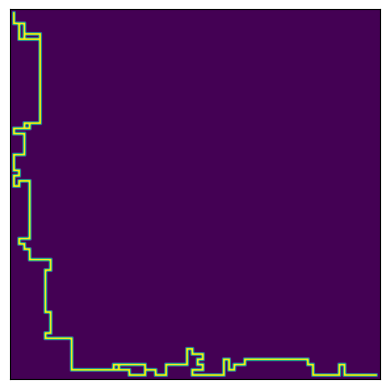

In [8]:
plot_objects([list(steps)], [1], len(grid), len(grid[0]))